In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('covtype.data',header=None)

In [3]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [4]:
df = df.drop(df.columns[9:54],axis=1)
df.shape

(581012, 10)

In [5]:
df.columns=['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Cover_Type']

In [6]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Cover_Type
0,2596,51,3,258,0,510,221,232,148,5
1,2590,56,2,212,-6,390,220,235,151,5
2,2804,139,9,268,65,3180,234,238,135,2
3,2785,155,18,242,118,3090,238,238,122,2
4,2595,45,2,153,-1,391,220,234,150,5


In [7]:
df.shape

(581012, 10)

In [27]:
df=df.dropna(axis=0,how='any')

In [28]:
df.shape
##Since there are no missing values in the data, we drop the rows randomly to make computation faster

(581012, 10)

In [8]:
newdf=df.sample(frac=0.015, replace=False, random_state=1,ignore_index=True)

In [9]:
newdf.to_csv('newdf.csv')

In [9]:
newdf.shape

(8715, 10)

In [10]:
newdf['Cover_Type'].dtype

dtype('int64')

In [11]:
#changing the target variable to string since it is a categorical variable
newdf['Cover_Type'] = newdf['Cover_Type'].astype(str)

In [12]:
newdf['Cover_Type'].dtype
#dtype is O , that is pandas strings

dtype('O')

In [33]:
newdf.shape[0]

8715

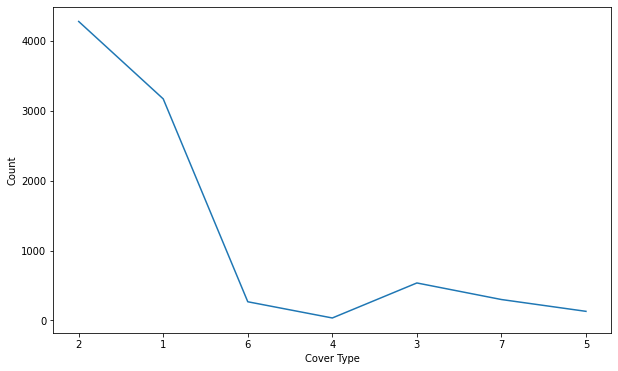

In [19]:
import matplotlib.pyplot as plt

coverUnique=newdf['Cover_Type'].unique()
lst = []
# coverlen=[coverUnique.count(x) for x in covertypes]
for cover in coverUnique :
    lst.append(len(newdf[newdf['Cover_Type']==cover]))
plt.figure(figsize=(10,6))
plt.plot(coverUnique,lst)
plt.xlabel('Cover Type')
plt.ylabel('Count')
plt.show()

In [34]:
## Now that we have created 10 samples, we will train test split
kernels=['rbf','sigmoid','poly',
         'linear']


In [35]:
from sklearn import svm
from sklearn.model_selection import train_test_split
import random

In [36]:
from sklearn.metrics import accuracy_score

In [20]:

bestAcc = -9999
bestKernel = ''
bestNu = 0
bestTol=0
bestTill = -9999
accuracy_report=[]

In [38]:
samples=[]
for x in range(newdf.shape[0]):
    samples.append(newdf.sample(frac=0.1,replace=False))

In [ ]:
for samp in range(len(samples)):
    # samples[samp]=pd.DataFrame(samples[samp])
    samp_x=samples[samp].drop('Cover_Type',axis=1)
    samp_y=samples[samp]['Cover_Type']
    sampn=[]
    samp_x_train,samp_x_test,samp_y_train,samp_y_test=train_test_split(samp_x,samp_y,train_size=0.7,random_state=1)
    bestAcc = -9999
    bestKernel = ''
    bestNu = 0
    bestTol=0
    x=0
    while x<10 :
        
        nuval=random.uniform(0,0.1)
        
        tol=random.uniform(0,0.00001)
        
        kernel=kernels[random.randint(0,3)]
        try :
           
            model1=svm.NuSVC(kernel=kernel,nu=nuval,tol=tol)
            
            
            model1.fit(samp_x_train,samp_y_train)
            
            y_pred=model1.predict(samp_x_test)
            
            acc=accuracy_score(samp_y_test,y_pred)
            if acc > bestAcc :
                bestAcc = acc
                bestKernel = kernel
                bestNu = nuval
                bestTol=tol
          
            x += 1
        except BaseException :
            # print(BaseException)
    accuracy_report.append(['S'+str(samp+1),bestAcc,bestKernel,bestNu,bestTol])
    
        
    
    